In [1]:
import numpy as np
import math as mt
import scipy.fftpack as sf
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
nx=ny=257
mx=16
my=8
lx=2*np.pi/0.15; ly=lx
dx=lx/nx; dy=ly/ny
nt=5000; isav=25; dt=2e-2
kap=0.1
x = np.arange(nx)*dx
y = np.arange(ny)*dy
X,Y = np.meshgrid(x,y)
px=np.linspace(-mx/2,mx/2,mx)*2.*np.pi/lx
px[8]=0
px[7]=0
print(px)
py=np.arange(my)*2.*np.pi/ly
A=np.zeros((mx,my))+0.*1j
phi=np.zeros((nx,ny))+0.*1j
# had at 0.3-0.5 loop for 64 nx.
# had 0-8 for both modes

for k in range(mx):
    rand=random.uniform(0,2*np.pi)
    A[int(random.uniform(4,12)),int(random.uniform(0,8))]=random.uniform(0.08,0.15)*np.exp(1j*rand)
    
A[8,int(random.uniform(3*my/8,4*my/8))] = 0.11*np.exp(1j*random.uniform(0,2*np.pi))

rand=random.uniform(0,2*np.pi)
A[8,int(my/4)]=1.*np.exp(1j*rand)  

[-1.2  -1.04 -0.88 -0.72 -0.56 -0.4  -0.24  0.    0.    0.24  0.4   0.56
  0.72  0.88  1.04  1.2 ]


In [3]:
# Actual IC

for i in range(nx):
    for j in range(ny):
        for m1 in range(mx):
            for m2 in range(my):
                phi[i,j]=phi[i,j]+A[m1,m2]*np.exp(1j*px[m1]*x[i]+1j*py[m2]*y[j])
phi=np.real(phi)
phi=np.transpose(phi)

In [4]:
phihst =np.zeros((nt//isav,nx,ny))
phifhst =np.zeros((nt//isav,nx,ny))
zetahst =np.zeros((nt//isav,nx,ny))

# kx =2*np.pi/lx*np.r_[np.arange(nx/2),np.arange(-nx/2,0)]
b =np.arange(0,19.25,0.15)
a=np.arange(-19.2,-0.15,0.15)
kx=np.concatenate((b,a))
ky=kx
# ky =2*np.pi/ly*np.r_[np.arange(ny/2),np.arange(-ny/2,0)]
# print(kx)

# for de-aliasing (not sure what this does. Need to research)
# kxd=np.r_[np.ones(nx//3),np.zeros(nx//3+nx%3),np.ones(nx//3)]
# kyd=np.r_[np.ones(ny//3),np.zeros(ny//3+ny%3),np.ones(ny//3)]

# Create meshgrid and also define kx^2 and ky^2
kx2=kx**2; ky2=ky**2
KX, KY =np.meshgrid(kx ,ky )
KX2,KY2 =np.meshgrid(kx2,ky2)
# KXD,KYD =np.meshgrid(kxd,kyd)

phif = sf.fft2(phi)
zetaf = -(KX2+KY2)*phif

phihst[0,:,:] = phi
zetahst[0,:,:] = sf.ifft2(zetaf)
phifhst[0,:,:] = np.fft.fftshift(np.real(sf.fft2(phi)))

/home/frra1220/.local/lib/python3.5/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x
/curc/tools/jupyter/software/dev/jupyterhub/lib/python3.5/site-packages/ipykernel_launcher.py:27: ComplexWarning: Casting complex values to real discards the imaginary part


/home/frra1220/.local/lib/python3.5/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


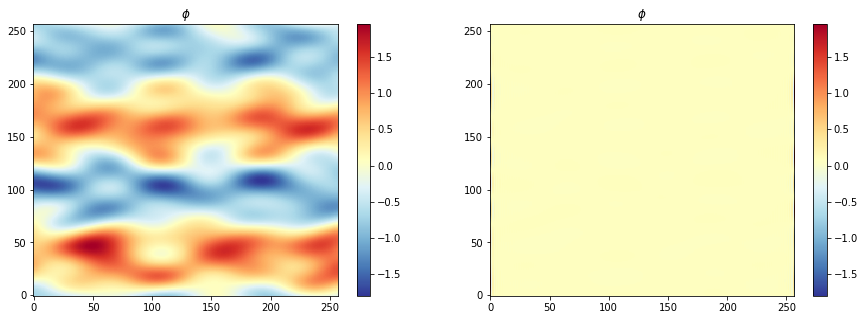

In [8]:
sizetuple = (15,5)
fig, ax = plt.subplots(ncols=2,figsize=sizetuple)

ra = 0

# can use jet color scheme for cmap as well..
im1=ax[0].imshow(phi,aspect='auto',origin='lower',cmap='RdYlBu_r');ax[0].axis('on');fig.colorbar(im1, ax=ax[0]);ax[0].set_title(r'$\phi$')
im2=ax[1].imshow(np.real(sf.ifft2(-(KX2+KY2)*phif)),aspect='auto',origin='lower',cmap='RdYlBu_r');ax[1].axis('on');fig.colorbar(im1, ax=ax[1]);ax[1].set_title(r'$\phi$')
# ax[1].set_xlim(-16,16)
# ax[1].set_ylim(-16,16)

plt.show()

In [9]:
import warnings
warnings.simplefilter('error', RuntimeWarning)
def HM(nx,ny,lx,ly,nt,dt,kap,mu,phi,isav):
    global KX,KY,KX2,KY2,KXD,KYD

    # Define dx and dy:
    dx=lx/nx; dy=ly/ny

    ### define grids ###
    # np.r_: concatenate any number of array slices along row (row-wise merging).
    # np.arange(start,stop,step): return evenly spaced vales within a given interval. 
    # kx = 2*pi*n/lx; ky = 2*pi*m/ly, where n and m are integers. 
    # so actually L = 41.88...
    # kx =2*np.pi/lx*np.r_[np.arange(nx/2),np.arange(-nx/2,0)]
    # ky =2*np.pi/ly*np.r_[np.arange(ny/2),np.arange(-ny/2,0)]
    b =np.arange(0,19.25,0.15)
    a=np.arange(-19.2,-0.15,0.15)
    kx=np.concatenate((b,a))
    ky=kx

    # for de-aliasing (not sure what this does. Need to research)
    kxd=np.r_[np.ones(nx//3),np.zeros(nx//3+nx%3),np.ones(nx//3)]
    kyd=np.r_[np.ones(ny//3),np.zeros(ny//3+ny%3),np.ones(ny//3)]

    # Create meshgrid and also define kx^2 and ky^2
    kx2=kx**2; ky2=ky**2
    KX, KY =np.meshgrid(kx ,ky )
    KX2,KY2 =np.meshgrid(kx2,ky2)
    KXD,KYD =np.meshgrid(kxd,kyd)

    whst=np.zeros((nt//isav,nx,ny))  
    wfhst=np.zeros((nt//isav,nx,ny)) 
    phif = sf.fft2(phi)
    zetaf=-(KX2+KY2)*phif
    w = phi - np.real(sf.ifft2(zetaf))
    
    whst[0,:,:] = w
    wf = sf.fft2(w)
    wfhst[0,:,:]=wf

    for it in range(1,nt):

        #---Numerical Method: 4th-order Runge-Kutta
        # time adv. in spectral space (phif). 

        # Previous method has an integrating factor method involve due to hyperviscosity term. 
        # phif=np.exp(-mu*(KX2+KY2)**2*dt)*phif
        # But in this case mu=0 and therefore there is no hyperviscosity term involved. 

        gw1 = adv(wf)
        gw2 = adv(wf+0.5*dt*gw1)
        gw3 = adv(wf+0.5*dt*gw2)
        gw4 = adv(wf+dt*gw3)

        wf=wf+dt*(gw1+2*gw2+2*gw3+gw4)/6

        # Stores values every it%isav==0
        if(it%isav==0):

            # Transorm phi and zeta into real space using IFFT.
            w=np.real(sf.ifft2(wf))

            # Record phi and zeta values in allocated phi and zeta array at instance in time.
            phihst[it//isav,:,:]=w
	    
    return locals()

In [ ]:
def adv(phif):
    # phif[0,0]=0. # originally it's not small.
    # phif = phif # /nx

    zetaf=-(KX2+KY2)*phif
    kconstf=1./(1.+KX2+KY2)

    # Define spatial derivatives \partial_x phi, etc. for Poisson bracket.
    # This was written originally for Hasegawa-Wakatani.
    phixf = 1j*KX*phif;  phix =np.real(sf.ifft2(phixf*KXD*KYD))
    phiyf = 1j*KY*phif;  phiy =np.real(sf.ifft2(phiyf*KXD*KYD))
    zetaxf= 1j*KX*zetaf; zetax=np.real(sf.ifft2(zetaxf*KXD*KYD))
    zetayf= 1j*KY*zetaf; zetay=np.real(sf.ifft2(zetayf*KXD*KYD))

    # FFT2 real-space calculation of -phix*zetay+phiy*zetax-kap*phiy
    # derivative = sf.fft2(phix*zetay-phiy*zetax-kap*phiy)
    derivative = sf.fft2(-kap*np.real(sf.ifft2(phiyf)))

    # Multiply by kconstf.
    advff = kconstf*(derivative)

    return advff